   ## Chapter 3. 신경망
   
   #### 3-1. 신경망으로
   * 신경망의 중요한 성질 : 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습한다.   

#### 3-2. 신경망이랑 퍼셉트론이 어떻게 다른데?    

>  입력층 ------> 은닉층 --------> 출력층    
> 이런 신경망을 '2층 신경망' 이라고 한다.(가중치를 갖는 층이 2개뿐이기 때문)   
> (문헌에 따라 층의 개수로 '3층 신경망'이라고 할 때도 있으니 주의)

#### 3-3. 활성화 함수의 등장

 * 활성화 함수 : 입력 신호의 총합을 출력 신호로 변환하는 함수    
 * 입력 신호의 총합이 '활성화'를 일으키는지 여부를 정한다.    
 
 >  1(b) --------------->   
 >  x1(* w1) -----------> a --- h() ----> Y       
 >  x2(* w2) ----------->

#### 3-4. 활성화 함수

* 계단 함수 : 임계값을 경계로 출력이 바뀜   
* "퍼셉트론에서는 활성화 함수로 '계단 함수'를 이용한다."   
* 그럼 계단함수 이외의 함수를 이용하면 어때? -> 그게 바로 신경망의 첫발자국! 
---
 ex) 시그모이드 함수

#### 3-5. 계단 함수를 한 번 구현해보자.

In [ ]:
def step_function(x):
    y = (x>0)
    return y.astype(np.int)

* 넘파이 배열에 부등호 연산을 수행하면 배열에 부등호 연산을 수행한 bool 배열이 생성된다.   
* y = 배열 x에 대해 부등호 연산을 수행한 배열    
* astype(np.int)를 통해 bool 값을 0,1의 int 값으로 변환하여 반환   

#### 3-6. 계단 함수의 그래프

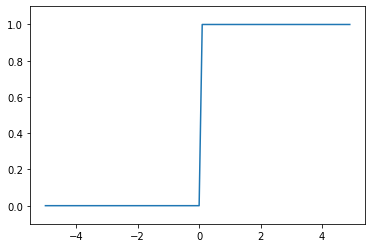

In [1]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype=np.int)

# -5.0에서 5.0까지 0.1간격의 넘파이 배열을 생성
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x,y)

# y축의 범위 지정
plt.ylim(-0.1, 1.1)
plt.show()

#### 3-7. 시그모이드 함수의 구현     

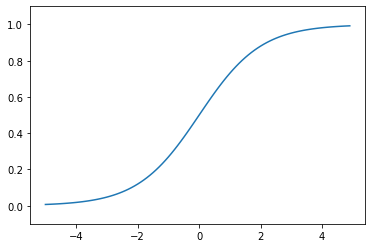

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 3-8. __계단 함수와 시그모이드 함수의 비교__       

* 모양의 차이   
   1) 계단 함수는 0/1 vs 시그모이드 함수는 여러가지 실수값을 돌려줌

* 그래도 두 함수 모두 출력은 0에서 1까지    
* 둘 다 비선형 함수이다    

> 신경망에서는 '활성화 함수'로 비선형 함수를 사용해야 한다.    
> 선형 함수는 입력의 상수배만큼 커지기 때문에, 은닉층이 없는 네트워크로도    
> 똑같은 기능을 할 수 있기 때문이다.

#### 3-9. ReLU 함수    

* ReLU(Rectified Linear Unit), 정류 선형 유닛

In [4]:
def relu(x):
    return np.maximum(0, x)

#### 3-10. 다차원 배열의 계산 

In [8]:
#1차원 배열
import numpy as np

A = np.array([1,2,3,4])
print(A)

#배열의 차원 수
print(np.ndim(A))

#배열의 형상
#튜플을 반환
print(A.shape)

A.shape[0]

[1 2 3 4]
1
(4,)


4

In [9]:
#2차원 배열
B = np.array([[1,2], [3,4], [5,6]])
print(B)

#배열의 차원 수
print(np.ndim(B))

#배열의 형상
#튜플을 반환
print(B.shape)

B.shape[0]

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


3

In [10]:
#2X2 행렬의 곱셈

A = np.array([[1,2], [3,4]])
A.shape

B = np.array([[3,4],[5,6]])
B.shape

np.dot(A,B)

array([[13, 16],
       [29, 36]])

In [14]:
#신경망에서의 행렬 곱
X = np.array([1,2])
print(X.shape)

W = np.array([[1,2,3], [4,5,6]])
print(W)

Y= np.dot(X, W)
print(Y)

(2,)
[[1 2 3]
 [4 5 6]]
[ 9 12 15]


#### 3.4  3층 신경망 구현하기      

- 3층 신경망(입력층(2) -> 은닉층1(3) -> 은닉층2(2) -> 출력층(2)) 구현하기      
- 넘파이의 다차원 배열 사용

In [3]:
#3층 신경망에서, 입력층에서 1층으로의 신호 전달
import numpy as np

x = np.array([1.0, 0.5])

w1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
b1 = np.array([0.1,0.2,0.3])

print(x.shape)
print(w1.shape)
print(b1.shape)

A1 = np.dot(x, w1) + b1
print(A1)

(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]


   * 활성화 층에서 가중치 합을 a로 표시하고, h(a)의 결과물을 z로 표시한다.      
   * 활성화 함수로는 시그모이드 함수를 사용한다.   

In [5]:
#시그모이드 함수
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

z1 = sigmoid(A1)

print(A1)
print(z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [8]:
#1층에서 2층으로 가는 신호 전달

w2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
b2 = np.array([0.1,0.2])

print(z1.shape)
print(w2.shape)
print(b2.shape)

#2층 연산의 입력값 A2와 활성화함수 h(A2)의 결과 z2
A2 = np.dot(z1, w2) +b2
z2 = sigmoid(A2)

print("A2 : " ,A2)
print("Z2 : ", z2)

(3,)
(3, 2)
(2,)
A2 :  [0.51615984 1.21402696]
Z2 :  [0.62624937 0.7710107 ]


In [10]:
#2층에서 출력층으로의 신호 전달
#다른 층과 달리, 활성화 함수 부분이 다름.

def identify_function(x):
    return x

w3 = np.array([[0.1,0.3], [0.2,0.4]])
b3 = np.array([0.1,0.2])

A3 = np.dot(z2, w3) + b3
Y = identify_function(A3)

print("결과값 : " ,Y)

결과값 :  [0.31682708 0.69627909]


   > 위의 출력층 식이 다른 층 식과 다른 이유
   1. 출력층은 활성화 함수를 시그모이드 함수 대신 '항등함수' 로 적용하였다.    
       -> __출력층의 활성화 함수는 풀고자 하는 문제에 맞게 정함__ 예를 들어, 회귀에는 항등, 2클래스에는 시그모이드, 다중에는 소프트맥스를 일반적으로 활용한다.    
       
       * 시그모이드 함수는 딥러닝 모델이 깊어질수록 기울기가 사라지는 Gradient Vanishing 현상이 발생함. 딥러닝에 비추.     
       * 출력 값들의 총합이 항상 1이 되는 특성을 가진 함수. 딥러닝에서 출력 노드의 활성화 함수로 많이 사용.   

#### 3.5 출력층 설계하기

   1) 출력층 설계의 의미     
     - 신경망은 분류와 회귀 모두에 이용 가능하다.     
     - 일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용한다.      
    
   2) 항등 함수              
     - 항등함수(identity_function)는 입력을 그래도 출력함    
     
   3) 소프트맥스 구현하기     
     - 소프트맥스의 출력은 모든 입력 신호로부터 화살표를 받는다.     
     - 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받기 때문(시그마)

In [12]:
# 소프트맥스 함수 구현

#이 a가 마지막 은닉층에서 출력층으로 전달된 값이라고 하고
a = np.array([0.3, 2.9, 4.0])

# 마지막 은닉층에서 전달받은 값을 지수화 
exp_a = np.exp(a)
print(exp_a)

# 모든 은닉층에서 전달받은 값을 지수화
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

# 소프트맥스 함수 공식 ㅇㅇ
y = exp_a/sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [13]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    
    y = exp_a / sum_exp_a
    
    return y

 * 소프트맥스 함수 구현의 주의점 : __오버플로 문제 발생 가능성__ 이 있다.

In [17]:
#개선된 소프트맥스 함수 구현

#종래의 소프트맥스 함수
#프린트하니 'overflow encountered in exp' 라는 경고가 뜨는 것을 확인했다.
a = np.array([1010, 1000, 990])
np.exp(a)/np.sum(np.exp(a))

c = np.max(a)
print("최대값을 뺀 값 : ", a-c)

np.exp(a-c)/np.sum(np.exp(a-c))
print("개선된 소프트맥스 값 :" , np.exp(a-c)/np.sum(np.exp(a-c)))

최대값을 뺀 값 :  [  0 -10 -20]
개선된 소프트맥스 값 : [9.99954600e-01 4.53978686e-05 2.06106005e-09]


/home/ssac23/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/home/ssac23/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
#개선된 소프트맥스 함수 생김새

def softmax(a):
    c = np.max(a)
    
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    
    y = exp_a/sum_exp_a
    
    return y

#### 3-6. 소프트맥스 함수의 특징       

1) 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수     
2) 소프트맥스 함수 출력의 총합은 1.

In [18]:
a = np.array([0.3, 2.9, 4.0])

y = softmax(a)
print(y)

np.sum(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


   > 이 성질 덕분에 __소프트맥스 함수의 출력은 == 확률__ 이라고 생각할 수 있다.

3) 지수함수가 단조 증가함수이므로, 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다.     
4) 이러한 성질을 통해, '가장 큰 확률' 을 보이는 클래스를 정답으로 예측한다.    
5) 현업에서는 일반적으로 지수 함수 학습에 드는 자원을 줄이기 위해 출력층의 소프트맥스 함수를 생략한다.(학습시에는 필요함)     

* 단조 증가 함수? : 주어진 순서를 보존하는 함수.

#### 3.7 출력층의 뉴런 수 정하기       

1) 출력 층의 뉴런 수는 풀려는 문제에 맞게 정한다. ex)일반적으로 분류에서는 분류하고자 하는 클래스의 수로 설정한다.

#### * 손글씨 숫자 인식(MNIST)

In [21]:
import sys, os

sys.path.append(os.pardir)
from datasets.mnist import load_mnist

(x_train, t_train), (x_test, t_test)= \load_mnist(flatten=True, normalize=False)

SyntaxError: unexpected character after line continuation character (<ipython-input-21-231ff196f9e9>, line 6)

* Flatten 인수 : 입력 이미지를 1차원 배열로 평탄화 할 것인지 여부를 물어봄.    
* normalize 인수 : 입력 이미지의 픽셀값을 0.0~1.0사이로 정규화 할 것인지를 물어봄.    
* 원-핫 인코딩 : 정답이 아닌 원소는 전부 0처리 하여 0/1로 나눈 배열

   * 배치 처리
       - 하나로 묶은 입력 데이터   
       - 배치 처리는 고도로 최적화 된 수치 계산 라이브러리의 환경이 뒷받침되었기에 가능하다.    
       - 큰 신경망에서는 데이터 전송 자체가 병목현상을 일으키는 경우가 있어, 이를 완화하기 위해 배치처리를 하여 버스에의 부하를 줄인다.(느린 I/O가 데이터를 자주 읽으러 가지 않고, 빠른 CPU/GPU가 한꺼번에 많이 받아 처리하도록 함)    
       - 큰 배열 한꺼번에 계산 > 작은 배열 여러번 계산

## 이번 장 핵심 정리      

1. 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU같은 매끄럽게 변화하는 함수를 이용한다 <-> 계단함수   
2. 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.      
3. 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.      
4. 출력층의 활성화 함수로 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 사용한다.    
5. 분류에서는 출력층의 뉴런 수를 분류하려는 클래스의 수와 같게 설정한다.     
6. 입력 데이터를 묶은 것을 배치라고 하며 추론 처리를 배치 단위로 진행하면 빠르게 결과를 얻을 수 있다.    